# Outlier Detection

### Alex Isbill

Import the things we'll need:

In [37]:
import pandas as pd
import numpy as np
import imageio
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
plt.rcParams.update({'figure.max_open_warning': 0})

The following CSV file contains an index of all the images you have to work with. It has columns for just the Filename and the full URL where the image lives.

In [38]:
image_index = pd.read_csv("https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_21f/data/ecu-per.csv")
image_index

,Filename,URL
0,ecu-per-00000.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
1,ecu-per-00001.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
2,ecu-per-00002.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
3,ecu-per-00003.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
4,ecu-per-00004.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
...,...,...
3348,ecu-per-03350.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
3349,ecu-per-03351.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
3350,ecu-per-03352.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
3351,ecu-per-03353.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...


Your job is to augment the `image_index` DataFrame with an additional column called `Inlier` with type `bool` which is `True` if that row corresponds to a real image (i.e, is an inlier), and `False` if it corresponds to a bogus image (i.e., an outlier).

(perform your analysis here)

**Testing to find outliers**
* Create a sample of 100 random images.
* Create a new index column in order to easily loop over images.

In [39]:
sample = image_index.sample(100)
sample["Nums"] = np.arange(len(sample))
sample = sample.set_index("Nums")
sample

,Filename,URL
Nums,,
0,ecu-per-01729.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
1,ecu-per-00267.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
2,ecu-per-02329.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
3,ecu-per-00546.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
4,ecu-per-02620.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
...,...,...
95,ecu-per-01693.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
96,ecu-per-01102.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
97,ecu-per-02046.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...


**Looking at the sample:**
* Looping over the images in the sample, we print out each one (with its name) and look for anything strange.
* It is clear that the outlier are the images with the crossed out camera, for example image 2301.
* We must determine a unique property that determines whether an image is an outlier.

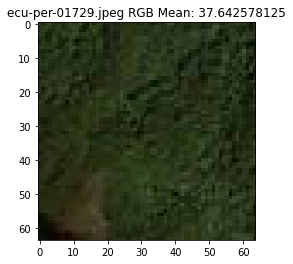

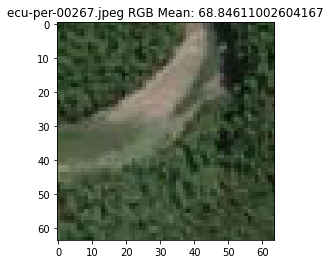

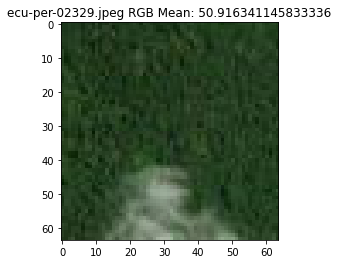

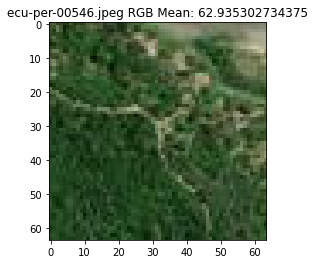

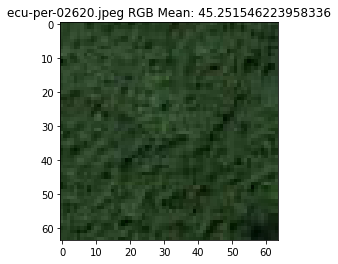

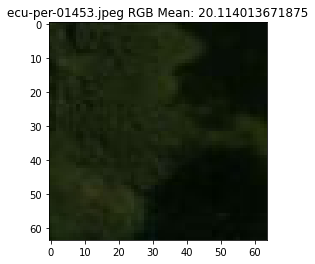

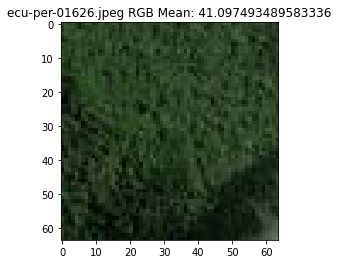

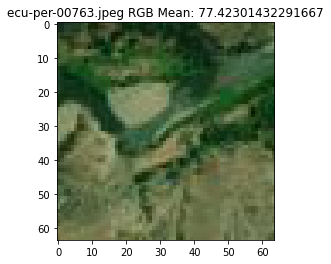

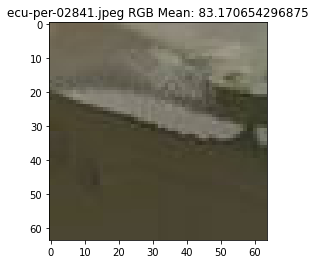

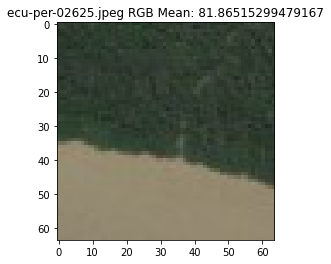

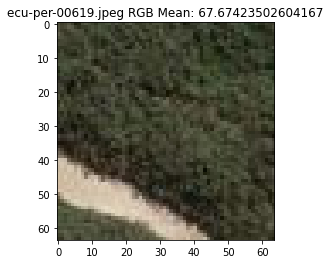

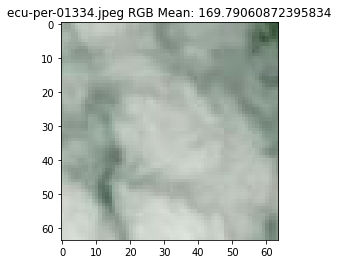

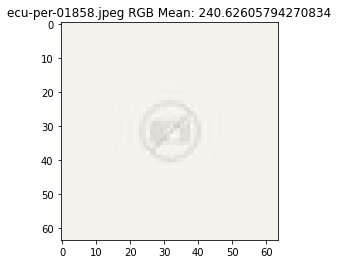

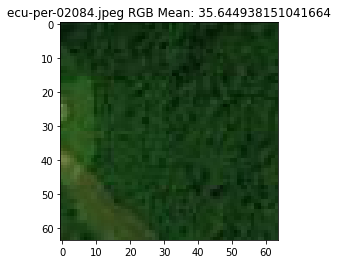

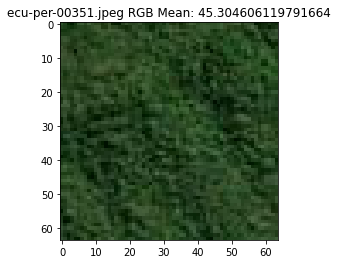

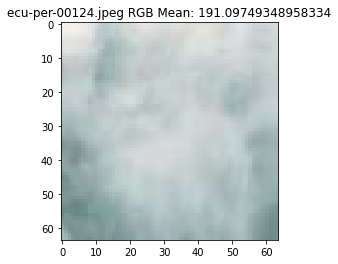

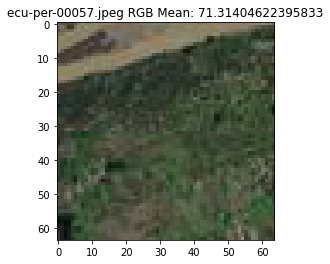

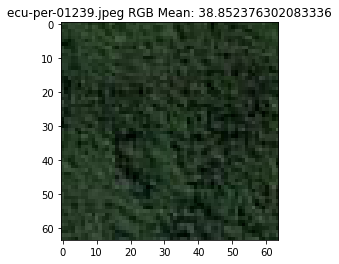

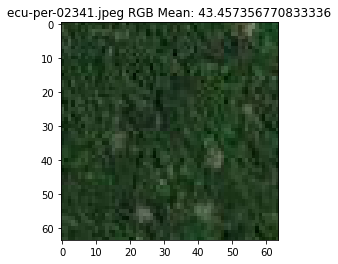

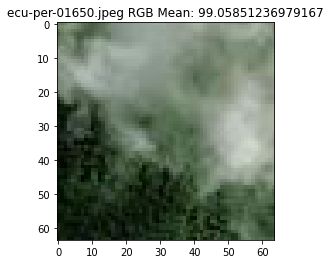

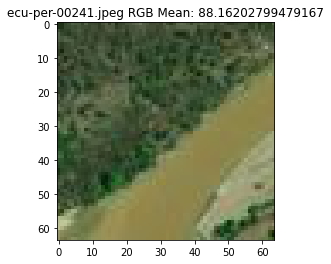

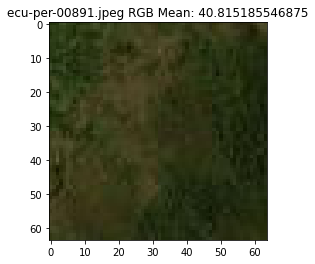

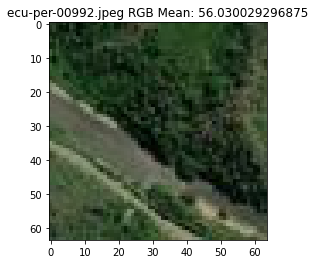

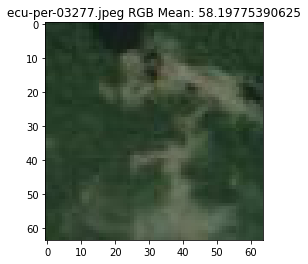

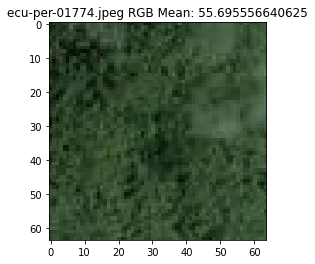

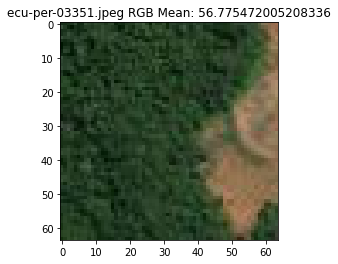

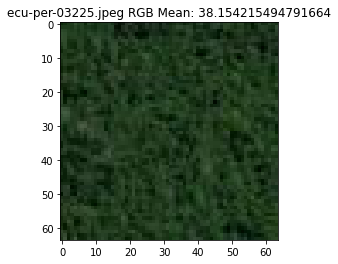

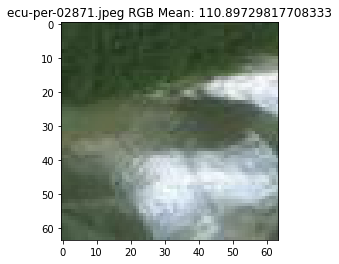

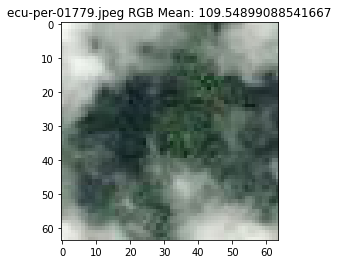

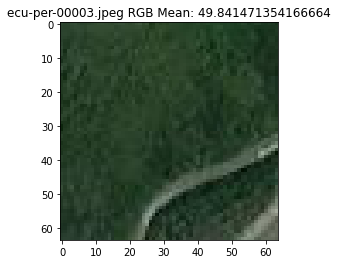

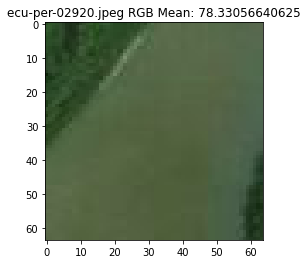

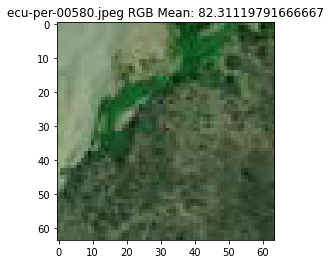

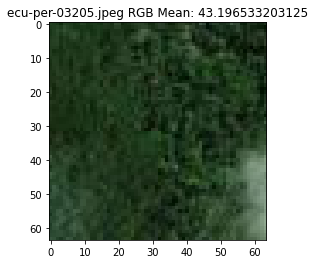

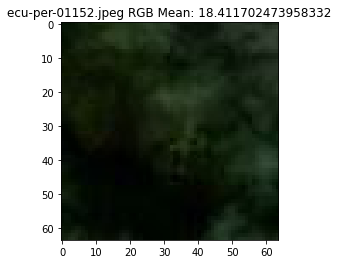

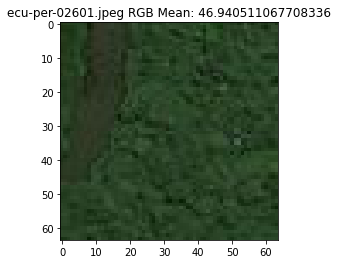

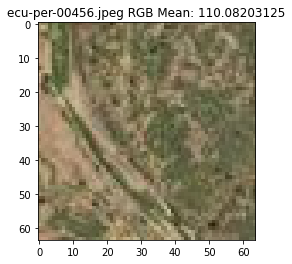

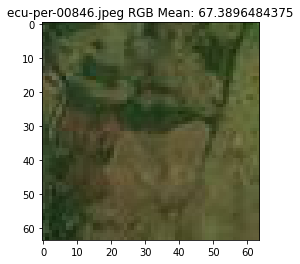

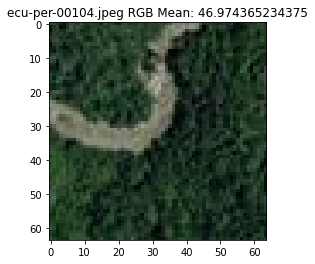

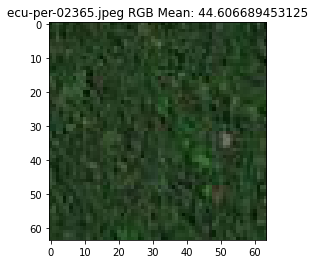

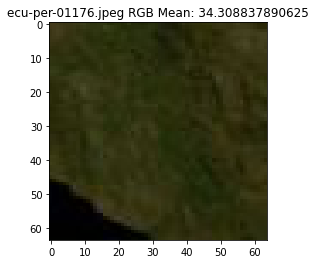

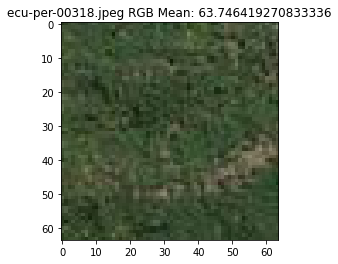

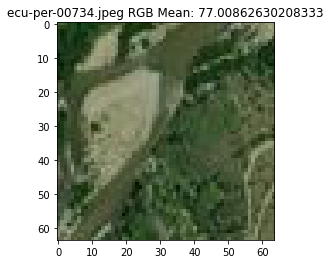

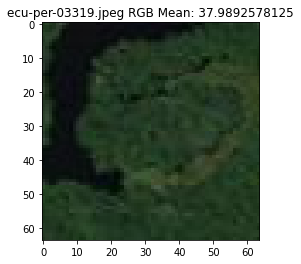

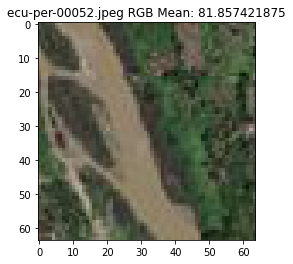

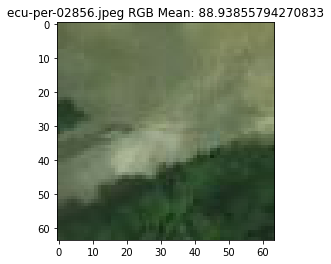

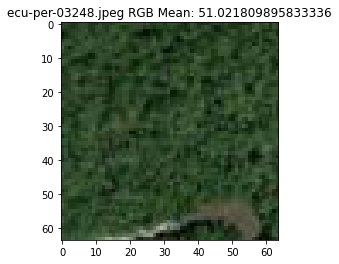

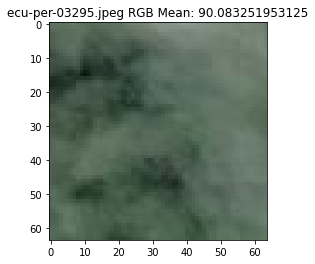

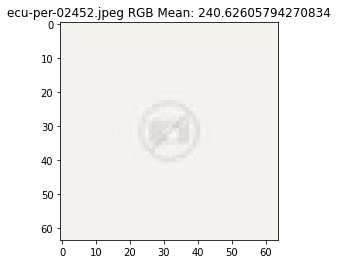

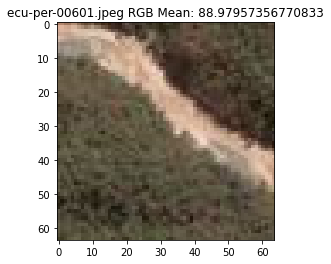

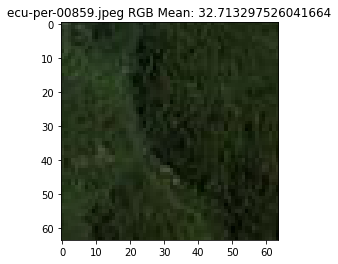

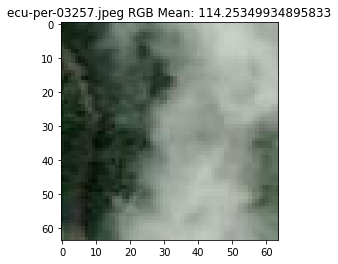

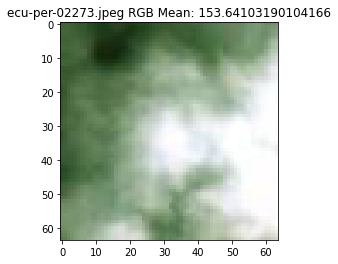

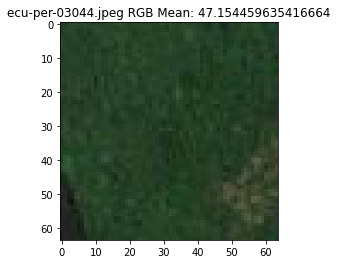

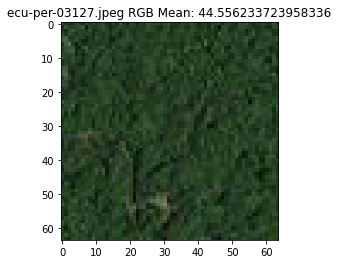

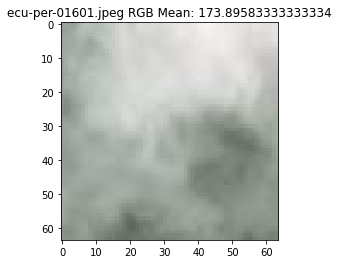

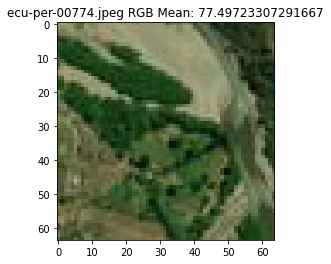

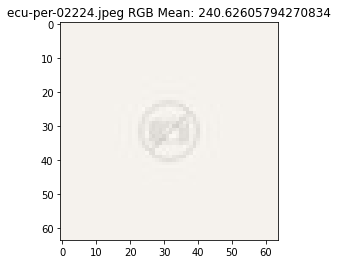

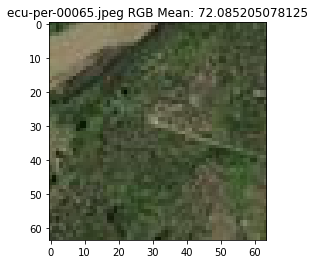

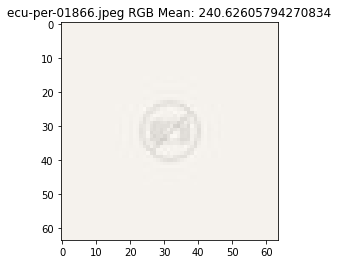

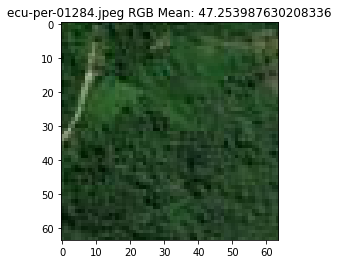

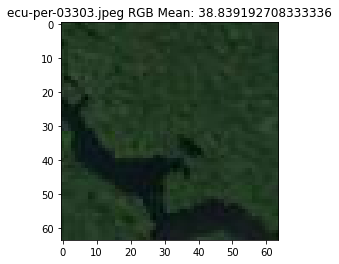

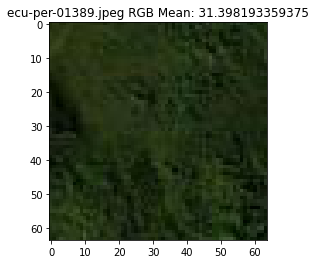

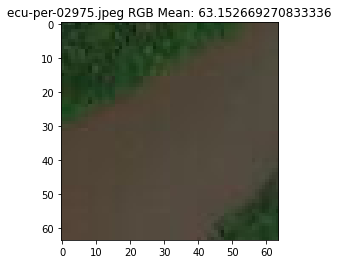

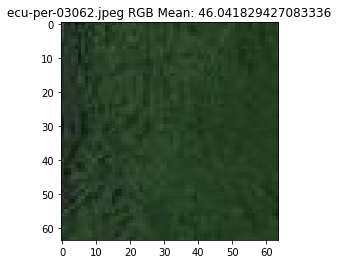

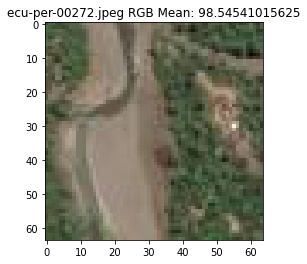

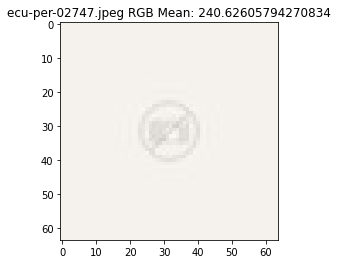

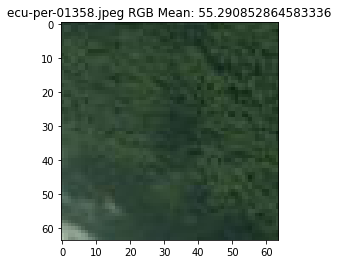

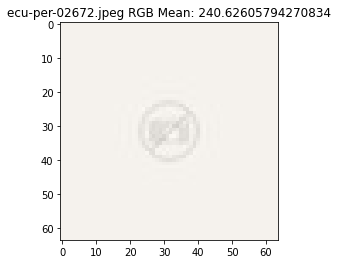

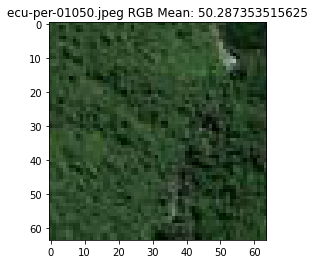

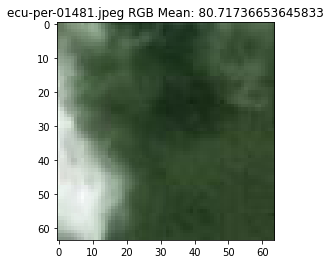

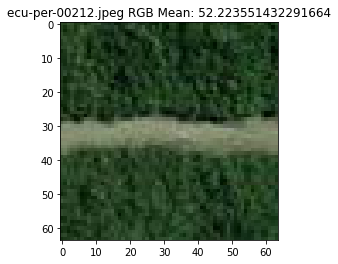

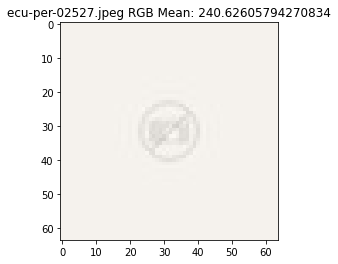

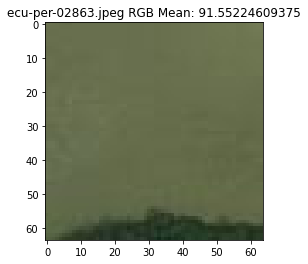

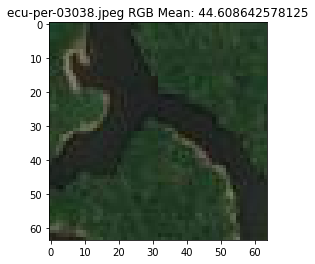

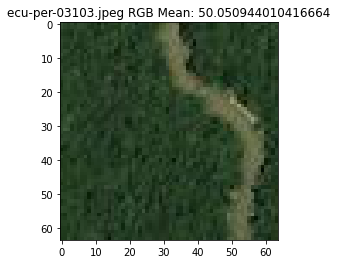

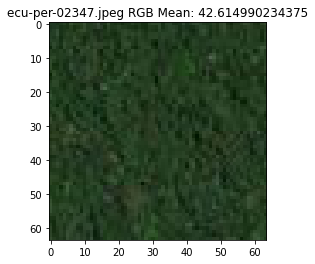

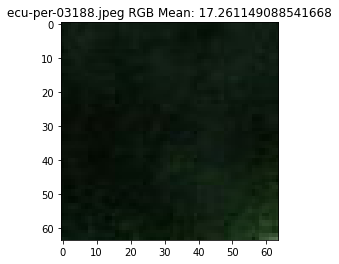

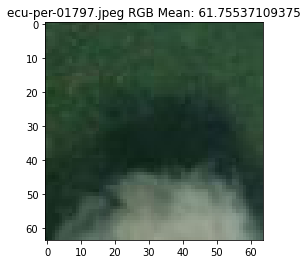

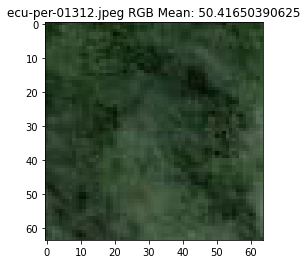

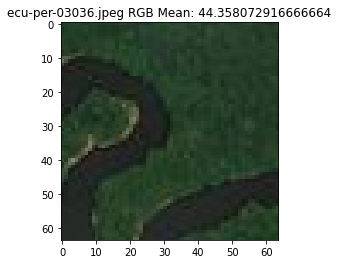

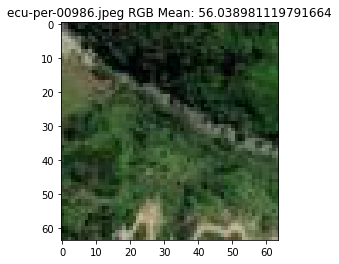

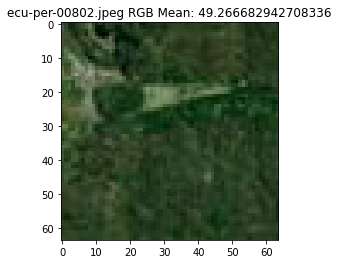

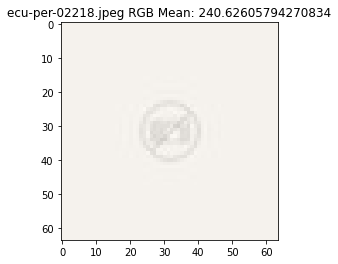

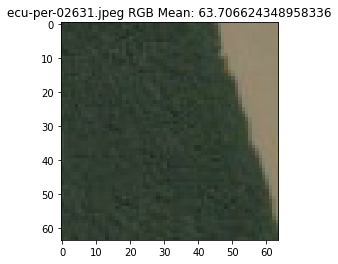

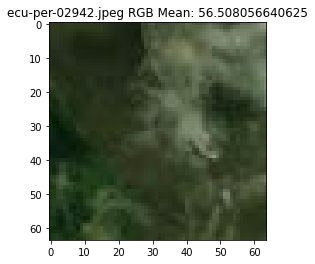

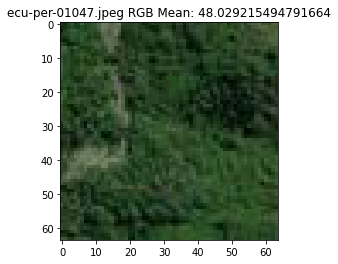

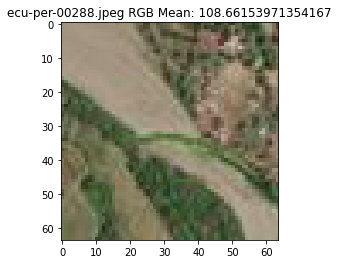

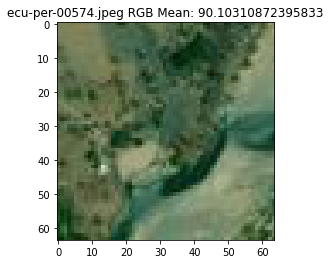

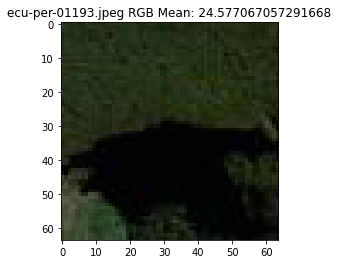

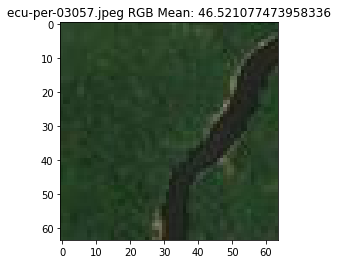

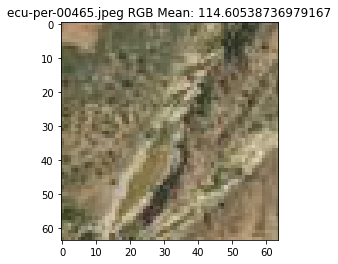

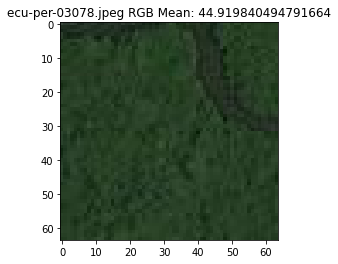

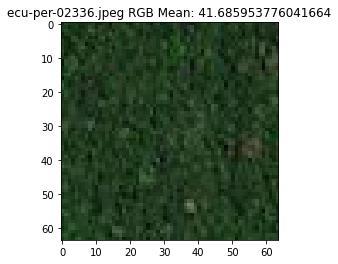

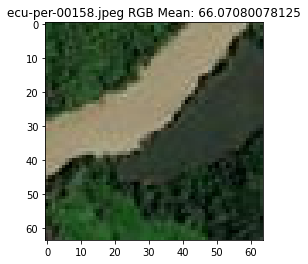

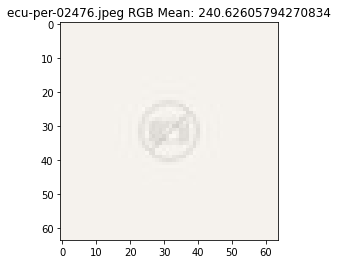

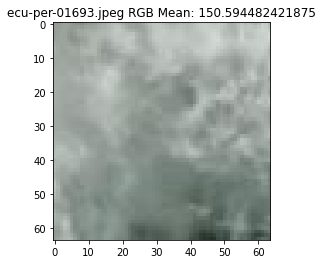

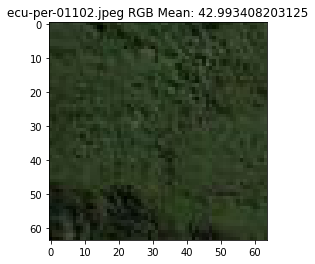

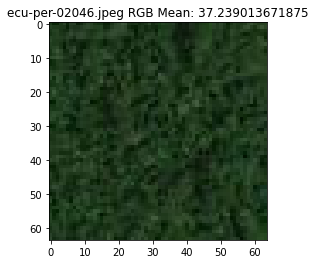

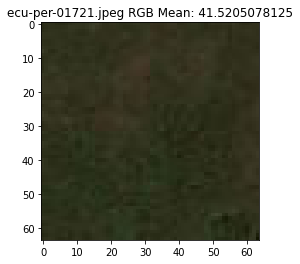

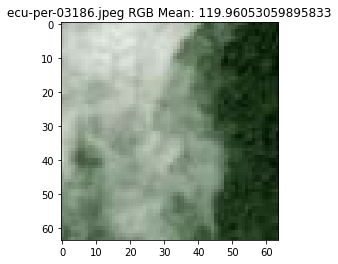

In [40]:
for i in range(100):
    img1 = imageio.imread(sample["URL"][i])
    plt.figure()
    plt.imshow(img1)
    plt.title(str(sample["Filename"][i]) + " RGB Mean: " + str(img1.mean()))

**Creating a Filter:**
* Looking at an example of an outlier, we know that it's RGB value will be unique.
    * Because all outliers are the same (from looking at the sample), we know that real images will have different RGB mean values than the outliers.
* We can now loop through all images and set the "Inlier" column of images with the outlier mean value to be False.

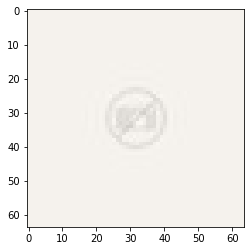

In [41]:
img = imageio.imread(image_index["URL"][2301])
plt.imshow(img)
badMean = img.mean()

In [42]:
image_index["Inlier"] = True
for i in range(3353):
    img2 = imageio.imread(image_index["URL"][i])
    if img2.mean() == badMean:
        image_index["Inlier"][i] = False 

---
Please leave the cells below unchanged, and make sure you run them before submitting - I'll use these to take a look at your results when grading.

Submit the CSV file produced by the last cell to Canvas alongside your notebook.

In [43]:
image_index # should now have an Inlier column

,Filename,URL,Inlier
0,ecu-per-00000.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...,True
1,ecu-per-00001.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...,True
2,ecu-per-00002.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...,True
3,ecu-per-00003.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...,True
4,ecu-per-00004.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...,True
...,...,...,...
3348,ecu-per-03350.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...,True
3349,ecu-per-03351.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...,True
3350,ecu-per-03352.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...,True
3351,ecu-per-03353.jpeg,https://facultyweb.cs.wwu.edu/~wehrwes/courses...,True


In [44]:
image_index["Inlier"].value_counts() # will show how many inliers and outliers you found

True     2742
False     611
Name: Inlier, dtype: int64

In [45]:
image_index.to_csv("image_index.csv", index=False)